### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import Figure, output_notebook, show, save
from bokeh.models import ColumnDataSource, HoverTool, GroupFilter, CDSView

### **Import the Dataset**

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

### **Preliminary Data Exploration**

This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. It contains the following variables: 
* Gender
* Age (years)
* Height (m)
* Weight (kg)
* Has a family member suffered or suffers from overweight? (as "family_history_with_overweight")
* Do you eat high caloric food frequently?	(as "FAVC")
* Do you usually eat vegetables in your meals? (as "FCVC") - never/sometimes/always
* How many main meals do you have daily? (as "NCP") - between 1 and 2/Three/More than three
* Do you eat any food between meals? (as "CAEC") - No/Sometimes/Frequently/Always
* Do you smoke? (as "SMOKE")
* How much water do you drink daily? (as "CH2O") 
* Do you monitor the calories you eat daily? (as "SCC")
* How often do you have physical activity? (as "FAF")
* How much time do you use technological devices such as cell phone, videogames, television, computer and others? (as "TUE")
* How often do you drink alcohol?	(as "CALC") - No/Sometimes/Frequently/Always
* Which transportation do you usually use? (as "MTRANS") - Automobile/Motorbike/Bike/Public_Transportation/Walking
* Obesity level (as "NObeyesdad") - Insufficient_Weight/Normal_Weight/Overweight_Level_I/Overweight_Level_II/Obesity_Type_I/Obesity_Type_II/Obesity_Type_III

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
# Check the shape of the dataframe
df.shape

(2111, 17)

In [5]:
# Check for missing values
df.isna().values.any()

False

In [6]:
# Check duplicate rows
df.duplicated().sum()

24

In [8]:
# Create a copy of the original Dataframe with duplicate rows removed
data = df.copy()
data.drop_duplicates(inplace=True)

In [9]:
# Deleting outliers from the dataframe

# Define the numeric columns where outliers will be eliminated
selected_columns = ['Weight', 'Height']

# Define z-score threshold
threshold = 3

# Create a mask to identify outliers
outliers_mask = np.zeros(len(data), dtype=bool)

for col in selected_columns:
    z_scores = (data[col] - data[col].mean()) / data[col].std()
    outliers_mask = outliers_mask | (z_scores.abs() > threshold)

# Filter the dataframe to eliminate the outliers
data_cleaned = data[~outliers_mask]

outliers_removed = len(data) - len(data_cleaned)




In [11]:
# Descriptive statistics
data_cleaned.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000,2086.000000
mean,24.356135,1.702594,86.817435,2.421189,2.701036,2.004752,1.012339,0.662874
std,6.368808,0.093136,26.129081,0.534715,0.764770,0.608430,0.853405,0.608254
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.923389,1.630089,66.000000,2.000000,2.696759,1.590670,0.123045,0.000000
50%,22.849670,1.701575,83.059034,2.395051,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769445,108.009452,3.000000,3.000000,2.467831,1.675361,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
data_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
# Mapping the categories to new groups
category_mapping = {
    'Insufficient_Weight': 'Insufficient Weight',
    'Normal_Weight': 'Normal Weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obesity',
    'Obesity_Type_II': 'Obesity',
    'Obesity_Type_III': 'Obesity'
}

# Apply the mapping
data_cleaned.loc[:, 'Obesity_level_grouped'] = data_cleaned['NObeyesdad'].map(category_mapping)
data_cleaned.head()

/kas/legacy/kate_python_37/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity_level_grouped
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Overweight


In [14]:
data_cleaned.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity_level_grouped
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Overweight


### **Functions**

In [16]:
# Function to change strings values from a column ('yes', 'no') to integer values (1, 0)
def string_to_int(value):
    if value == 'yes':
        return 1
    else:
        return 0

In [ ]:
# Function to change the range of physical activity
def freq_faf(value):
    if value <= 1:
        return "rarely"
    elif value >1 and value <= 2:
        return "sometimes"
    else:
        return "frequently"

In [ ]:
# Function to convert string values from column "MTRANS" to integer values
def transport(value):
    if value == 'Public_Transportation':
        return 0
    elif value == 'Walking':
        return 1
    elif value == 'Automobile':
        return 2
    elif value == 'Motorbike':
        return 3

### **Data Visualisation**

In [17]:
obesity_dist = data_cleaned['NObeyesdad'].value_counts()
obesity_dist

Obesity_Type_I         351
Obesity_Type_III       323
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

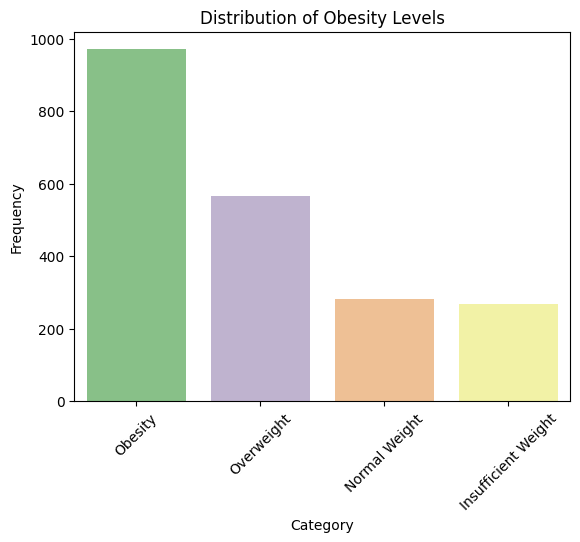

In [18]:
# Countplot
sns.countplot(x='Obesity_level_grouped', palette='Accent', data=data_cleaned, order=data_cleaned['Obesity_level_grouped'].value_counts().index)

plt.title('Distribution of Obesity Levels')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

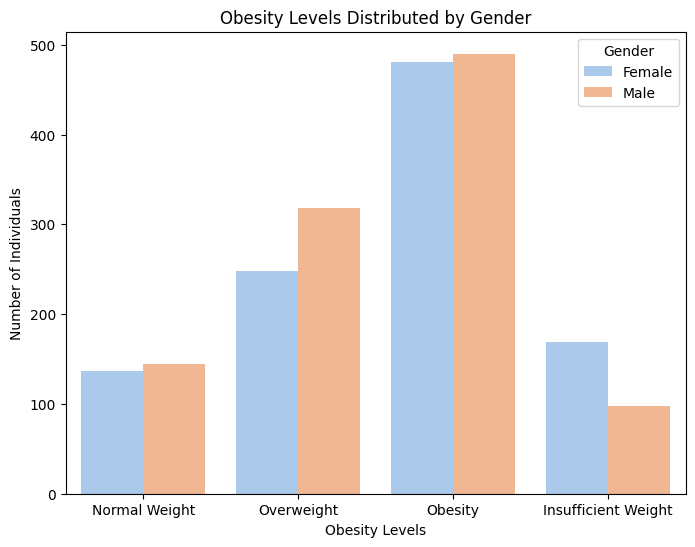

In [19]:
# Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Obesity_level_grouped', hue='Gender', data=data_cleaned, palette='pastel')

plt.title('Obesity Levels Distributed by Gender')
plt.xlabel('Obesity Levels')
plt.ylabel('Number of Individuals')

plt.legend(title='Gender')
plt.show()

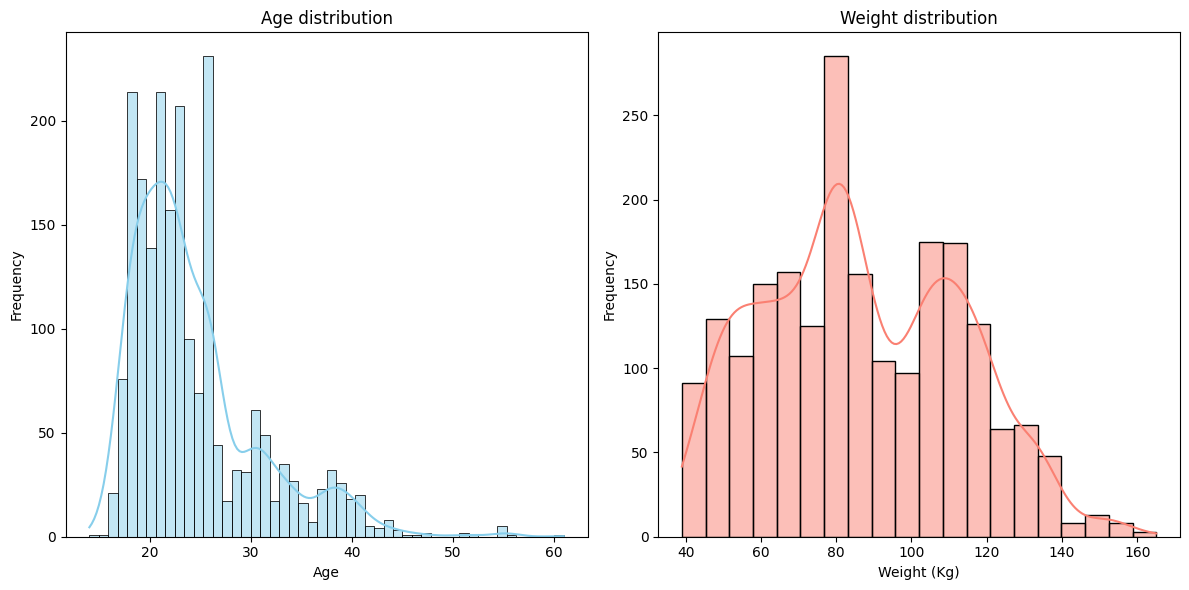

In [20]:
# Histplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Age distribution
sns.histplot(data_cleaned['Age'], ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Age distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Weight distribution
sns.histplot(data_cleaned['Weight'], ax=axes[1], color='salmon', kde=True)
axes[1].set_title('Weight distribution')
axes[1].set_xlabel('Weight (Kg)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


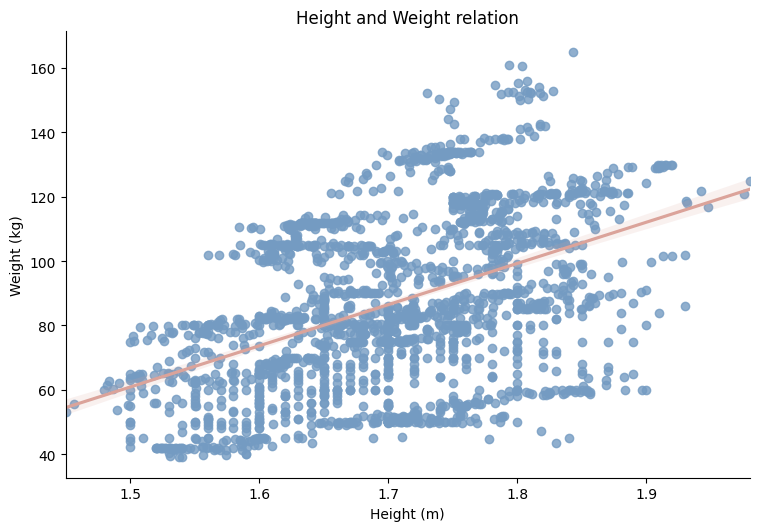

In [23]:
# lmplot
scatter_colours = {'color': '#749BC2'}
line_colours = {'color': '#DBA39A'}
sns.lmplot(x='Height', y='Weight', data=data_cleaned, height=5, aspect=1.5, line_kws=line_colours, scatter_kws=scatter_colours)

plt.title('Height and Weight relation')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')

plt.grid(False)
plt.show()

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

<Figure size 800x600 with 0 Axes>

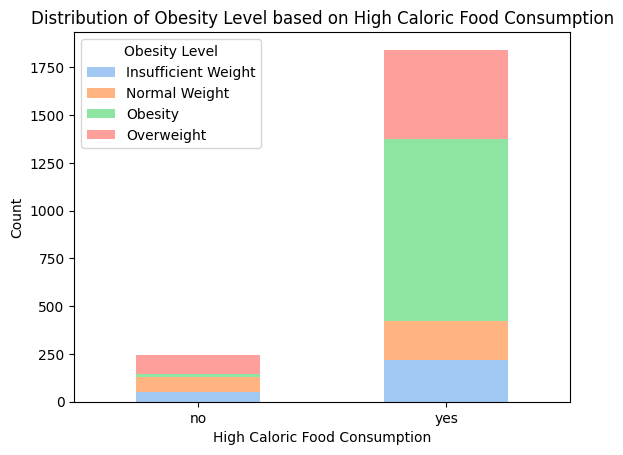

In [25]:
# Stacked Bar Chart
grouped_df = data_cleaned.groupby(['FAVC', 'Obesity_level_grouped']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
grouped_df.plot(kind='bar', stacked=True, color=sns.color_palette('pastel'))

plt.title('Distribution of Obesity Level based on High Caloric Food Consumption')
plt.xlabel('High Caloric Food Consumption')
plt.ylabel('Count')

plt.legend(title='Obesity Level')
plt.xticks(rotation=0)

In [26]:
# Apply string_to_int function to "FAVC" column
data_favc = data_cleaned.copy()
data_favc.loc[:, 'FAVC'] = data_favc['FAVC'].apply(string_to_int)
data_favc.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity_level_grouped
0,Female,21.0,1.62,64.0,yes,0,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,Normal Weight
1,Female,21.0,1.52,56.0,yes,0,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,Normal Weight
2,Male,23.0,1.80,77.0,yes,0,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,Normal Weight
3,Male,27.0,1.80,87.0,no,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,Overweight
4,Male,22.0,1.78,89.8,no,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,Overweight


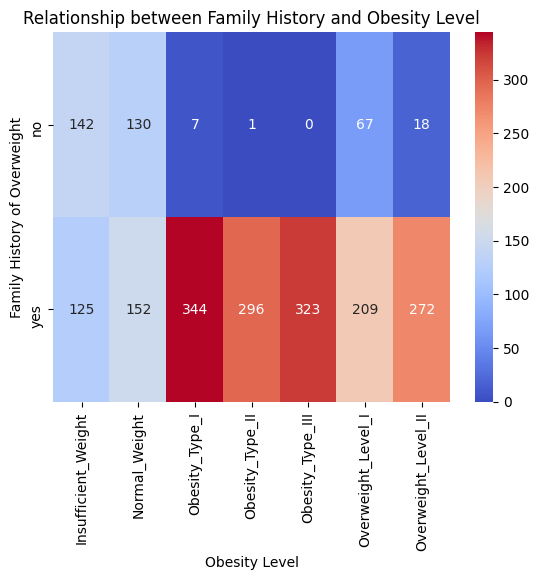

In [31]:
# Heatmap
contingency_table = pd.crosstab(data_cleaned['family_history_with_overweight'], data_cleaned['NObeyesdad'])

sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='g')

plt.title('Relationship between Family History and Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Family History of Overweight')

plt.show()

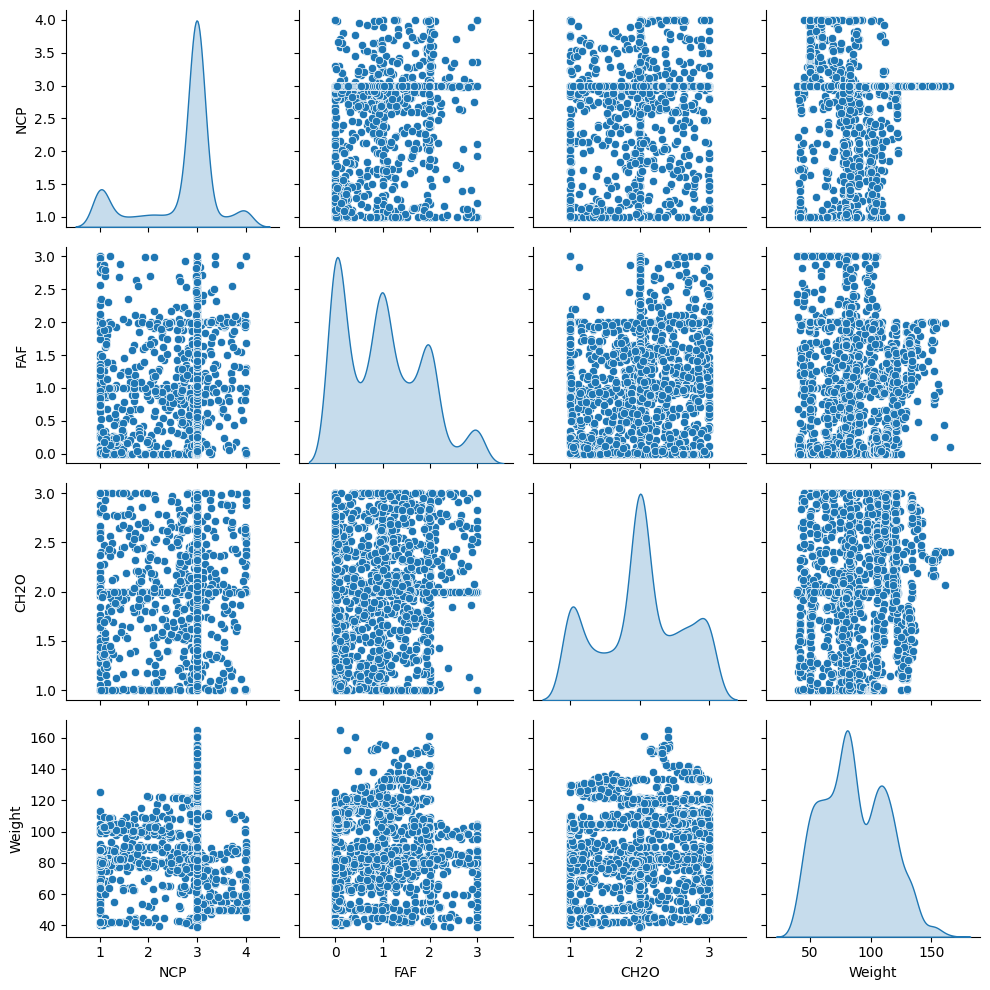

In [32]:
# Pairplot
variables_of_interest = ['NCP', 'FAF', 'CH2O', 'Weight']
sns.pairplot(data_cleaned[variables_of_interest], diag_kind='kde', kind='scatter')

plt.tight_layout()

plt.show()


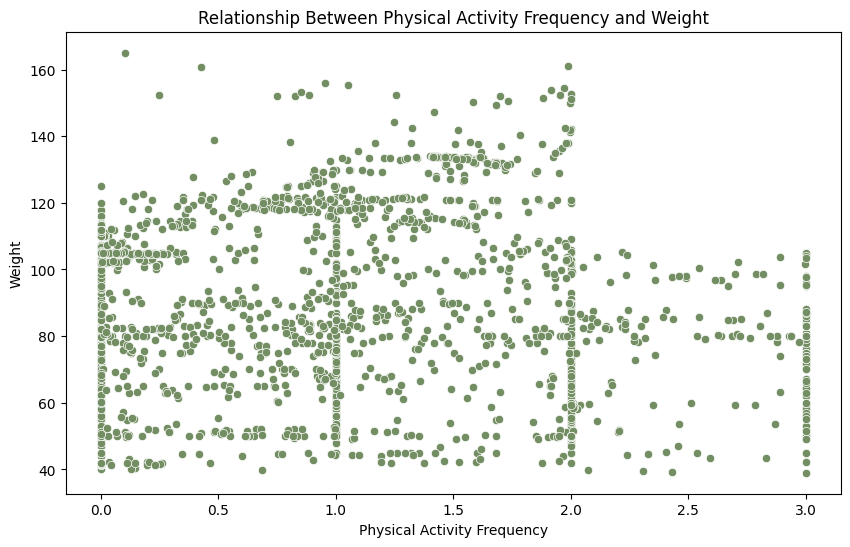

In [45]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAF', y='Weight', color='#748E63', data=data_cleaned)

plt.title('Relationship Between Physical Activity Frequency and Weight')
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Weight')

plt.show()

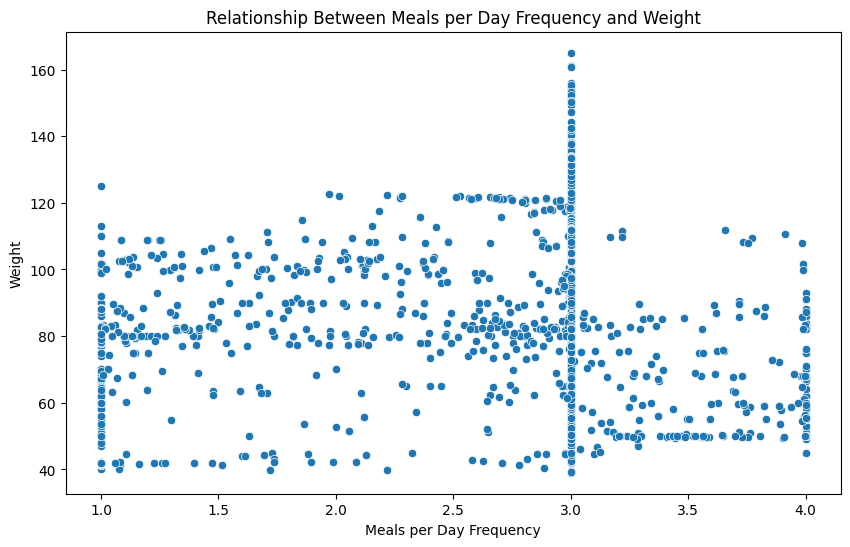

In [36]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NCP', y='Weight', data=data_cleaned)

plt.title('Relationship Between Meals per Day Frequency and Weight')
plt.xlabel('Meals per Day Frequency')
plt.ylabel('Weight')

plt.show()

In [39]:
# Apply function "transport"
data_trans = data_cleaned.copy()
data_trans.loc[:, 'MTRANS'] = data_trans['MTRANS'].apply(transport)
data_trans.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Obesity_level_grouped
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,0.0,Normal_Weight,Normal Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,0.0,Normal_Weight,Normal Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,0.0,Normal_Weight,Normal Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,1.0,Overweight_Level_I,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,0.0,Overweight_Level_II,Overweight


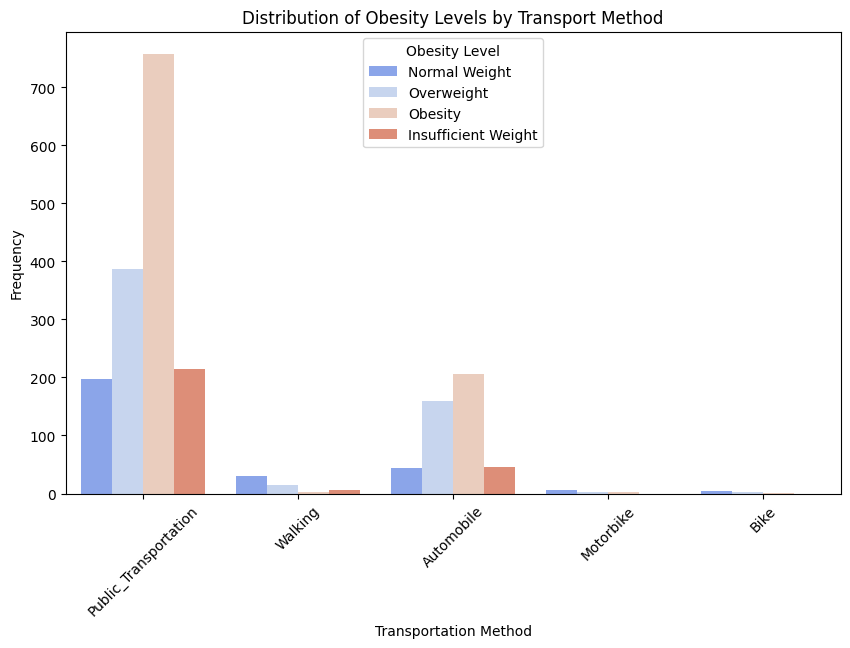

In [46]:
# Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='MTRANS', hue='Obesity_level_grouped', palette='coolwarm')

plt.title('Distribution of Obesity Levels by Transport Method')
plt.xlabel('Transportation Method')
plt.ylabel('Frequency')

plt.xticks(rotation=45)

plt.legend(title='Obesity Level')
plt.show()